# Density-Based Clustering
We apply density-based cluestering to known datasets used for clustering, Chamaleon and Birch3, available at https://cs.joensuu.fi/sipu/datasets/

First, we load the libraries we need.

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons

import matplotlib.pyplot as plt
%matplotlib inline

Next we define some palettes.

In [2]:
from matplotlib.colors import ListedColormap
dots_cmap = ListedColormap(['#e20c32','#1b80e8']) #,,])'#599062'
plt.register_cmap(cmap=dots_cmap)
colors = ['#1b80e8','#599062','#e20c32']

We read the Chamaleon dataset and plot it.

In [3]:
df = pd.read_csv('Chamaleon.txt',sep=" ")

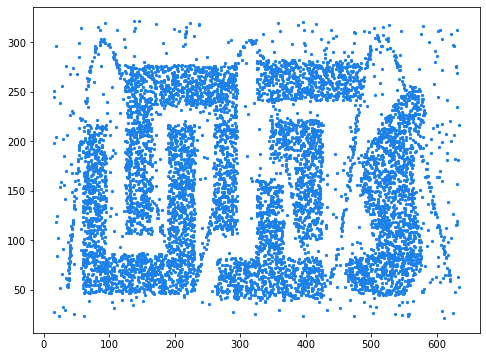

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(df['x'],df['y'],s=5.0,c=colors[0])
plt.savefig("Chamaleon.png")

We apply DBSCAN

In [5]:
db = DBSCAN(eps=10, min_samples=10).fit(df.values)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

The function labels as -1 the noisy points all the other values are cluster indexes. So let's print some statistics.

In [6]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
noisy_points = db.labels_==-1
cluster_points = ~noisy_points

In [7]:
print("Number of clusters = %d"%n_clusters_)
print("Number of cluster points = %d"%sum(cluster_points))
print("Number of noisy points = %d"%sum(noisy_points))

Number of clusters = 15
Number of cluster points = 7722
Number of noisy points = 278


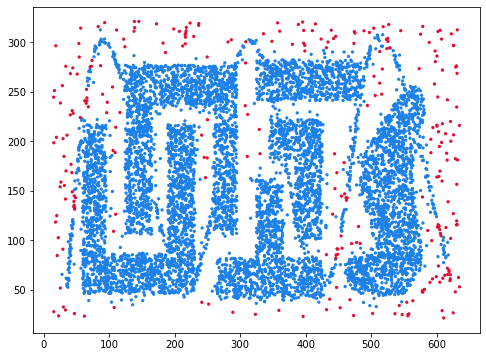

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(df['x'],df['y'],s=5.0,c=cluster_points,cmap=dots_cmap)
plt.savefig("ChamaleonClusteredPoints.png")

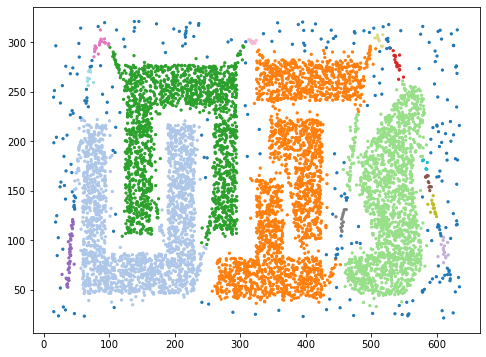

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(df['x'],df['y'],s=5.0,c=labels,cmap=plt.get_cmap('tab20'))
plt.savefig("ChamaleonClusters.png")

With an epsilon of 10 there are seveal clusters with few points. What would happen if we increase the epsilon? Or the number of minimum number points that define core objects?